In [19]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense

In [20]:
tcs = pd.read_csv(r'C:\Users\SKV\Codes\Unified_Mentor\TCS_stock\TCS_stock_history.csv') 
tcs.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [21]:
tcs['Date'] = pd.to_datetime(tcs['Date'])


In [22]:
tcs.sort_values(by='Date', inplace=True)

In [23]:
tcs.ffill(inplace=True)

In [24]:
tcs.dropna(inplace=True)


In [25]:
tcs['Year'] = tcs['Date'].dt.year
tcs['Year']

0       2002
1       2002
2       2002
3       2002
4       2002
        ... 
4458    2021
4459    2021
4460    2021
4461    2021
4462    2021
Name: Year, Length: 4463, dtype: int32

In [26]:
tcs['Month'] = tcs['Date'].dt.month
tcs['Month']


0       8
1       8
2       8
3       8
4       8
       ..
4458    9
4459    9
4460    9
4461    9
4462    9
Name: Month, Length: 4463, dtype: int32

In [27]:
tcs['Day'] = tcs['Date'].dt.day
tcs['Day']


0       12
1       13
2       14
3       15
4       16
        ..
4458    24
4459    27
4460    28
4461    29
4462    30
Name: Day, Length: 4463, dtype: int32

In [28]:
tcs['Day_of_Week'] = tcs['Date'].dt.dayofweek
tcs['Day_of_Week']

0       0
1       1
2       2
3       3
4       4
       ..
4458    4
4459    0
4460    1
4461    2
4462    3
Name: Day_of_Week, Length: 4463, dtype: int32

In [29]:
tcs['Prev_Close'] = tcs['Close'].shift(1)
tcs['Prev_Close']

0               NaN
1         29.519140
2         29.119476
3         27.111877
4         27.111877
           ...     
4458    3869.250000
4459    3871.300049
4460    3836.949951
4461    3779.149902
4462    3791.899902
Name: Prev_Close, Length: 4463, dtype: float64

In [30]:
tcs.dropna(inplace=True)


In [31]:
X = tcs[['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Day_of_Week', 'Month']]

y = tcs['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)


In [32]:
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

Linear Regression MSE: 42.0612054670637


In [33]:
print("Linear Regression R²:", r2_score(y_test, y_pred))

Linear Regression R²: 0.9999432046837814


In [35]:
from tensorflow.keras.layers import Input
scaler = MinMaxScaler()

scaled_close = scaler.fit_transform(tcs['Close'].values.reshape(-1, 1))

X_lstm_data = scaled_close[:-1]
y_lstm_data = scaled_close[1:]

X_lstm_data = X_lstm_data.reshape(-1, 1, 1)

lstm_model = Sequential()
lstm_model.add(Input(shape=(1, 1))) 
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_lstm_data, y_lstm_data, epochs=30, batch_size=15, verbose=1)


Epoch 1/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0380
Epoch 2/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2981e-04
Epoch 3/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.7830e-05
Epoch 4/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5813e-05
Epoch 5/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.0448e-05
Epoch 6/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1143e-05
Epoch 7/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3136e-05
Epoch 8/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6710e-05
Epoch 9/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.7702e-05
Epoch 10/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5026e-05
Epoch 11/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2318e-05
Epoch 12/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7715e-05
Epoch 13/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3598e-05
Epoch 14/30
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6176e-05
Epoch

In [36]:
last_sequence = scaled_close[-1].reshape(1, 1, 1) 

lstm_prediction_next = lstm_model.predict(last_sequence)

lstm_prediction_next_inv = scaler.inverse_transform(lstm_prediction_next)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


In [37]:
test_split_ratio = 0.2

split_index = int(len(scaled_close) * (1 - test_split_ratio))

X_lstm_train_scaled = scaled_close[:split_index][:-1]
y_lstm_train_scaled = scaled_close[:split_index][1:]
X_lstm_test_scaled = scaled_close[split_index:][:-1] 
y_lstm_test_scaled = scaled_close[split_index:][1:]  

X_lstm_test_scaled = X_lstm_test_scaled.reshape(-1, 1, 1)

lstm_predictions_scaled = lstm_model.predict(X_lstm_test_scaled)

lstm_predictions_inv = scaler.inverse_transform(lstm_predictions_scaled)

y_lstm_test_inv = scaler.inverse_transform(y_lstm_test_scaled)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 


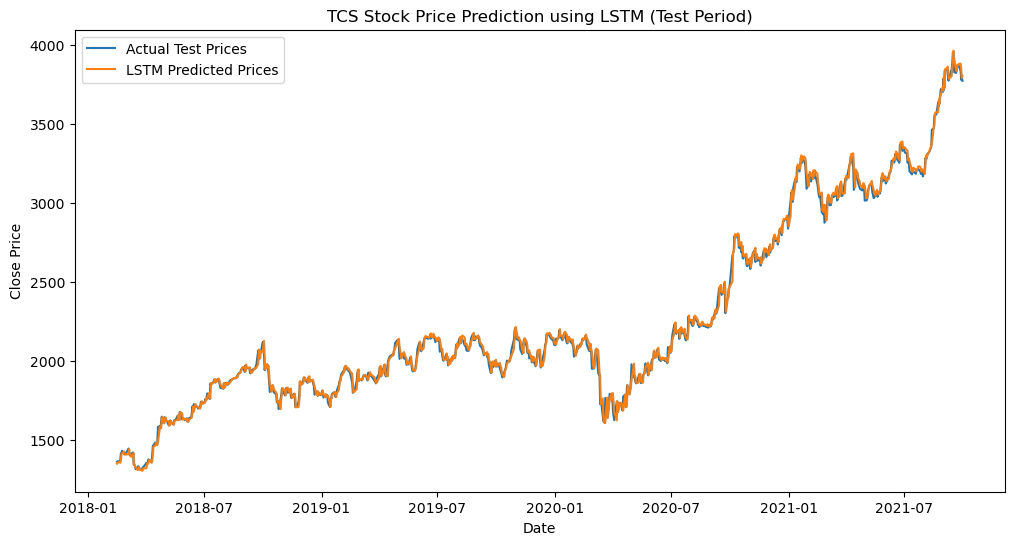

In [38]:
actual_test_dates = tcs['Date'].iloc[split_index + 1:] 

plt.figure(figsize=(12,6))
plt.plot(actual_test_dates, y_lstm_test_inv, label='Actual Test Prices')
plt.plot(actual_test_dates, lstm_predictions_inv, label='LSTM Predicted Prices')
plt.title('TCS Stock Price Prediction using LSTM (Test Period)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [39]:
mae_lstm = mean_absolute_error(y_lstm_test_inv, lstm_predictions_inv)
print("LSTM Mean Absolute Error (Test Set):", mae_lstm)

LSTM Mean Absolute Error (Test Set): 26.835372856379625
